# Classification Modeling on Adult Income

## Data Cleaning and Preprocesing

In [4]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('adult_income.csv')
data.head(20)

age         workclass  fnlwgt     education  education_num  \
0    39         State-gov   77516     Bachelors             13   
1    50  Self-emp-not-inc   83311     Bachelors             13   
2    38           Private  215646       HS-grad              9   
3    53           Private  234721          11th              7   
4    28           Private  338409     Bachelors             13   
5    37           Private  284582       Masters             14   
6    49           Private  160187           9th              5   
7    52  Self-emp-not-inc  209642       HS-grad              9   
8    31           Private   45781       Masters             14   
9    42           Private  159449     Bachelors             13   
10   37           Private  280464  Some-college             10   
11   30         State-gov  141297     Bachelors             13   
12   23           Private  122272     Bachelors             13   
13   32           Private  205019    Assoc-acdm             12   
14   40           Private  121772     Assoc-voc             11   
15   34           Private  245487       7th-8th              4   
16   25  Self-emp-not-inc  176756       HS-grad              9   
17   32           Private  186824       HS-grad              9   
18   38           Private   28887          11th              7   
19   43  Self-emp-not-inc  292175       Masters             14   

           marital_status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
5      Married-civ-spouse    Exec-managerial           Wife   
6   Married-spouse-absent      Other-service  Not-in-family   
7      Married-civ-spouse    Exec-managerial        Husband   
8           Never-married     Prof-specialty  Not-in-family   
9      Married-civ-spouse    Exec-managerial        Husband   
10     Married-civ-spouse    Exec-managerial        Husband   
11     Married-civ-spouse     Prof-specialty        Husband   
12          Never-married       Adm-clerical      Own-child   
13          Never-married              Sales  Not-in-family   
14     Married-civ-spouse       Craft-repair        Husband   
15     Married-civ-spouse   Transport-moving        Husband   
16          Never-married    Farming-fishing      Own-child   
17          Never-married  Machine-op-inspct      Unmarried   
18     Married-civ-spouse              Sales        Husband   
19               Divorced    Exec-managerial      Unmarried   

                  race     sex  capital_gain  capital_loss  hours_per_week  \
0                White    Male          2174             0              40   
1                White    Male             0             0              13   
2                White    Male             0             0              40   
3                Black    Male             0             0              40   
4                Black  Female             0             0              40   
5                White  Female             0             0              40   
6                Black  Female             0             0              16   
7                White    Male             0             0              45   
8                White  Female         14084             0              50   
9                White    Male          5178             0              40   
10               Black    Male             0             0              80   
11  Asian-Pac-Islander    Male             0             0              40   
12               White  Female             0             0              30   
13               Black    Male             0             0              50   
14  Asian-Pac-Islander    Male             0             0              40   
15  Amer-Indian-Eskimo    Male             0 

**Independet variables:**
* age
* workclass
* fnlwgt
* education
* education_num
* marital_status
* occupation
* relationship
* race
* sex
* capital_gain
* capital_loss
* hours_per_week
* native_country

**Target Feature**
* income


**Type of Classification: Binary** 

This is because in the target feature either they win more than 50k or equial or less than 50k

In [9]:
data.shape

(48842, 15)

Finding missing values

In [12]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

There are some missing values in this dataset, more specifically in the "workclass", "occupation" and "native_country" columns.

Finding duplicated values

In [16]:
data[data.duplicated()]

age         workclass  fnlwgt     education  education_num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  367749     Bachelors             13   
22494   49  Self-emp-not-inc   43479  Some-college             10   
25872   23           Private  240137       5th-6th              3   
26313   28           Private  274679       Masters             14   
28230   27           Private  255582       HS-grad              9   
28522   42           Private  204235  Some-college             10   
28846   39           Private   30916       HS-grad              9   
29157   38           Private  207202       HS-grad              9   
30845   46           Private  133616  Some-college             10   
31993   19           Private  251579  Some-college             10   
32404   35           Private  379959       HS-grad              9   
33425   24           Private  194630     Bachelors             13   
34229   19           Private  130431       5th-6th              3   
34415   22           Private  137876  Some-college             10   
34424   20               NaN  203353  Some-college             10   
36713   17           Private  153021          12th              8   
37639   29               NaN   41281     Bachelors             13   
38343   21           Private  301694       HS-grad              9   
38468   41           Private  116391     Bachelors             13   
38993   22               NaN  334593  Some-college             10   
39017   19           Private  139466  Some-college             10   
39911   30           Private  111567       HS-grad              9   
40677   19               NaN  167428  Some-college             10   
42386   25           Private  112835     Bachelors             13   
43387   23           Private  250630     Bachelors             13   
43484   23           Private  239539       HS-grad              9   
43750   37           Private   52870     Bachelors             13   
43773   29           Private   36440     Bachelors             13   
44307   47           Private  199058  Some-college             10   
45049   39           Private  184659       HS-grad              9   
46065   45           Private   82797     Bachelors             13   
46409   30           Private  180317     Assoc-voc             11   
46714   21           Private  243368     Preschool              1   
46869   25           Private  308144     Bachelors             13   
46959   19           Private  318822       HS-grad              9   
47048   31           Private  228873       HS-grad              9   
47399   43           Private  195258       HS-grad              9   
47884   23           Private  107882     Bachelors             13   
48521   18      Self-emp-inc  378036          12th              8   

              marital_status         occupation   relationship  \
4881           Never-married       Craft-repair  Not-in-family   
5104           Never-married      Other-service  Not-in-family   
9171           Never-married     Prof-specialty      Own-child   
11631          Never-married       Tech-support  Not-in-family   
13084          Neve

In [17]:
# droping all the duplicated values
data.drop_duplicates(inplace = True)

In [20]:
data.shape

(48790, 15)

### Handling missing values

#### Missing values in "workclass"

In [24]:
# checking the unique values
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [26]:
data[data['workclass'].isnull()]

age workclass  fnlwgt     education  education_num  \
27      54       NaN  180211  Some-college             10   
61      32       NaN  293936       7th-8th              4   
69      25       NaN  200681  Some-college             10   
77      67       NaN  212759          10th              6   
106     17       NaN  304873          10th              6   
...    ...       ...     ...           ...            ...   
48682   61       NaN  265201  Some-college             10   
48769   21       NaN  212661  Some-college             10   
48800   73       NaN  144872       HS-grad              9   
48812   81       NaN   26711     Assoc-voc             11   
48838   64       NaN  321403       HS-grad              9   

              marital_status occupation    relationship                race  \
27        Married-civ-spouse        NaN         Husband  Asian-Pac-Islander   
61     Married-spouse-absent        NaN   Not-in-family               White   
69             Never-married        NaN       Own-child               White   
77        Married-civ-spouse        NaN         Husband               White   
106            Never-married        NaN       Own-child               White   
...                      ...        ...             ...                 ...   
48682     Married-civ-spouse        NaN         Husband               White   
48769          Never-married        NaN       Own-child               White   
48800     Married-civ-spouse        NaN         Husband               White   
48812     Married-civ-spouse        NaN         Husband               White   
48838                Widowed        NaN  Other-relative               Black   

          sex  capital_gain  capital_loss  hours_per_week native_country  \
27       Male             0             0              60          South   
61       Male             0             0              40            NaN   
69       Male             0             0              40  United-States   
77       Male             0             0               2  United-States   
106    Female         34095             0              32  United-States   
...       ...           ...           ...             ...            ...   
48682    Male             0             0              14  United-States   
48769  Female             0             0              30  United-States   
48800    Male             0             0              25         Canada   
48812    Male          2936             0              20  United-States   
48838    Male             0             0              40  United-States   

      income  
27      >50K  
61     <=50K  
69     <=50K  
77     <=50K  
106    <=50K  
...      ...  
48682  <=50K  
48769  <=50K  
48800  <=50K  
48812  <=50K  
48838  <=50K  

[2795 rows x 15 columns]

In [28]:
#performing mode imputation to fill missing values dased on 'education' and 'income'
data['workclass'] = data.groupby('education')['workclass'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

In [30]:
data.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
income               0
dtype: int64

#### Missing values in "occupation"

In [33]:
# checking the unique values
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [35]:
data[data['occupation'].isnull()]

age workclass  fnlwgt     education  education_num  \
27      54   Private  180211  Some-college             10   
61      32   Private  293936       7th-8th              4   
69      25   Private  200681  Some-college             10   
77      67   Private  212759          10th              6   
106     17   Private  304873          10th              6   
...    ...       ...     ...           ...            ...   
48682   61   Private  265201  Some-college             10   
48769   21   Private  212661  Some-college             10   
48800   73   Private  144872       HS-grad              9   
48812   81   Private   26711     Assoc-voc             11   
48838   64   Private  321403       HS-grad              9   

              marital_status occupation    relationship                race  \
27        Married-civ-spouse        NaN         Husband  Asian-Pac-Islander   
61     Married-spouse-absent        NaN   Not-in-family               White   
69             Never-married        NaN       Own-child               White   
77        Married-civ-spouse        NaN         Husband               White   
106            Never-married        NaN       Own-child               White   
...                      ...        ...             ...                 ...   
48682     Married-civ-spouse        NaN         Husband               White   
48769          Never-married        NaN       Own-child               White   
48800     Married-civ-spouse        NaN         Husband               White   
48812     Married-civ-spouse        NaN         Husband               White   
48838                Widowed        NaN  Other-relative               Black   

          sex  capital_gain  capital_loss  hours_per_week native_country  \
27       Male             0             0              60          South   
61       Male             0             0              40            NaN   
69       Male             0             0              40  United-States   
77       Male             0             0               2  United-States   
106    Female         34095             0              32  United-States   
...       ...           ...           ...             ...            ...   
48682    Male             0             0              14  United-States   
48769  Female             0             0              30  United-States   
48800    Male             0             0              25         Canada   
48812    Male          2936             0              20  United-States   
48838    Male             0             0              40  United-States   

      income  
27      >50K  
61     <=50K  
69     <=50K  
77     <=50K  
106    <=50K  
...      ...  
48682  <=50K  
48769  <=50K  
48800  <=50K  
48812  <=50K  
48838  <=50K  

[2805 rows x 15 columns]

In [37]:
data['occupation'] = data.groupby('workclass')['occupation'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

C:\Users\car_f\AppData\Local\Temp\ipykernel_2900\894350228.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['occupation'] = data.groupby('workclass')['occupation'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))


In [39]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation         10
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    856
income              0
dtype: int64

In [41]:
data[data['occupation'].isnull()]

age     workclass  fnlwgt     education  education_num  \
5361    18  Never-worked  206359          10th              6   
10845   23  Never-worked  188535       7th-8th              4   
14772   17  Never-worked  237272          10th              6   
20337   18  Never-worked  157131          11th              7   
23232   20  Never-worked  462294  Some-college             10   
32304   30  Never-worked  176673       HS-grad              9   
32314   18  Never-worked  153663  Some-college             10   
41346   17  Never-worked  131593          11th              7   
44168   20  Never-worked  273905       HS-grad              9   
46459   18  Never-worked  162908          11th              7   

              marital_status occupation    relationship   race     sex  \
5361           Never-married        NaN       Own-child  White    Male   
10845               Divorced        NaN   Not-in-family  White    Male   
14772          Never-married        NaN       Own-child  White    Male   
20337          Never-married        NaN       Own-child  White  Female   
23232          Never-married        NaN       Own-child  Black    Male   
32304     Married-civ-spouse        NaN            Wife  Black  Female   
32314          Never-married        NaN       Own-child  White    Male   
41346          Never-married        NaN       Own-child  Black  Female   
44168  Married-spouse-absent        NaN  Other-relative  White    Male   
46459          Never-married        NaN       Own-child  White    Male   

       capital_gain  capital_loss  hours_per_week native_country income  
5361              0             0              40  United-States  <=50K  
10845             0             0              35  United-States  <=50K  
14772             0             0              30  United-States  <=50K  
20337             0             0              10  United-States  <=50K  
23232             0             0              40  United-States  <=50K  
32304             0             0              40  United-States  <=50K  
32314             0             0               4  United-States  <=50K  
41346             0             0              20  United-States  <=50K  
44168             0             0              35  United-States  <=50K  
46459             0             0              35  United-States  <=50K

In [43]:
data[data['workclass'] == 'Never-worked']

age     workclass  fnlwgt     education  education_num  \
5361    18  Never-worked  206359          10th              6   
10845   23  Never-worked  188535       7th-8th              4   
14772   17  Never-worked  237272          10th              6   
20337   18  Never-worked  157131          11th              7   
23232   20  Never-worked  462294  Some-college             10   
32304   30  Never-worked  176673       HS-grad              9   
32314   18  Never-worked  153663  Some-college             10   
41346   17  Never-worked  131593          11th              7   
44168   20  Never-worked  273905       HS-grad              9   
46459   18  Never-worked  162908          11th              7   

              marital_status occupation    relationship   race     sex  \
5361           Never-married        NaN       Own-child  White    Male   
10845               Divorced        NaN   Not-in-family  White    Male   
14772          Never-married        NaN       Own-child  White    Male   
20337          Never-married        NaN       Own-child  White  Female   
23232          Never-married        NaN       Own-child  Black    Male   
32304     Married-civ-spouse        NaN            Wife  Black  Female   
32314          Never-married        NaN       Own-child  White    Male   
41346          Never-married        NaN       Own-child  Black  Female   
44168  Married-spouse-absent        NaN  Other-relative  White    Male   
46459          Never-married        NaN       Own-child  White    Male   

       capital_gain  capital_loss  hours_per_week native_country income  
5361              0             0              40  United-States  <=50K  
10845             0             0              35  United-States  <=50K  
14772             0             0              30  United-States  <=50K  
20337             0             0              10  United-States  <=50K  
23232             0             0              40  United-States  <=50K  
32304             0             0              40  United-States  <=50K  
32314             0             0               4  United-States  <=50K  
41346             0             0              20  United-States  <=50K  
44168             0             0              35  United-States  <=50K  
46459             0             0              35  United-States  <=50K

In [45]:
data['occupation'] = data['occupation'].fillna('Unemployed')

In [47]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    856
income              0
dtype: int64

#### Missing values in "native_country"

In [50]:
# unique values
data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [52]:
# missing values
data[data['native_country'].isnull()]

age  workclass  fnlwgt     education  education_num  \
14      40    Private  121772     Assoc-voc             11   
38      31    Private   84154  Some-college             10   
51      18    Private  226956       HS-grad              9   
61      32    Private  293936       7th-8th              4   
93      30    Private  117747       HS-grad              9   
...    ...        ...     ...           ...            ...   
48245   46    Private   31411          11th              7   
48272   24    Private  127159  Some-college             10   
48604   24  State-gov  161783     Bachelors             13   
48651   34    Private  143776       Masters             14   
48826   50  Local-gov  139347       Masters             14   

              marital_status        occupation    relationship  \
14        Married-civ-spouse      Craft-repair         Husband   
38        Married-civ-spouse             Sales         Husband   
51             Never-married     Other-service       Own-child   
61     Married-spouse-absent      Craft-repair   Not-in-family   
93        Married-civ-spouse             Sales            Wife   
...                      ...               ...             ...   
48245     Married-civ-spouse     Other-service            Wife   
48272          Never-married     Other-service  Other-relative   
48604          Never-married  Transport-moving   Not-in-family   
48651          Never-married    Prof-specialty   Not-in-family   
48826     Married-civ-spouse    Prof-specialty            Wife   

                     race     sex  capital_gain  capital_loss  hours_per_week  \
14     Asian-Pac-Islander    Male             0             0              40   
38                  White    Male             0             0              38   
51                  White  Female             0             0              30   
61                  White    Male             0             0              40   
93     Asian-Pac-Islander  Female             0          1573              35   
...                   ...     ...           ...           ...             ...   
48245               White  Female             0             0              40   
48272               White  Female             0             0              24   
48604               Black    Male             0             0              40   
48651               Black    Male             0             0              45   
48826               White  Female             0             0              40   

      native_country income  
14               NaN   >50K  
38               NaN   >50K  
51               NaN  <=50K  
61               NaN  <=50K  
93               NaN  <=50K  
...              ...    ...  
48245            NaN  <=50K  
48272            NaN  <=50K  
48604            NaN  <=50K  
48651            NaN   >50K  
48826            NaN   >50K  

[856 rows x 15 columns]

In [54]:
# cheking for the posibility of backward fill or forward fill
data.groupby('race')['native_country'].unique()

race
Amer-Indian-Eskimo    [Mexico, United-States, Germany, South, Puerto...
Asian-Pac-Islander    [India, nan, South, United-States, Philippines...
Black                 [United-States, Cuba, Jamaica, Germany, Haiti,...
Other                 [United-States, Puerto-Rico, nan, Dominican-Re...
White                 [United-States, Puerto-Rico, nan, Honduras, Me...
Name: native_country, dtype: object

In [56]:
# filling missing values using mode imputation based on the race
data['native_country'] = data.groupby('race')['native_country'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

In [58]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

 Now that there are no more missing values, lets continue with the outliers

### Checking for outliers

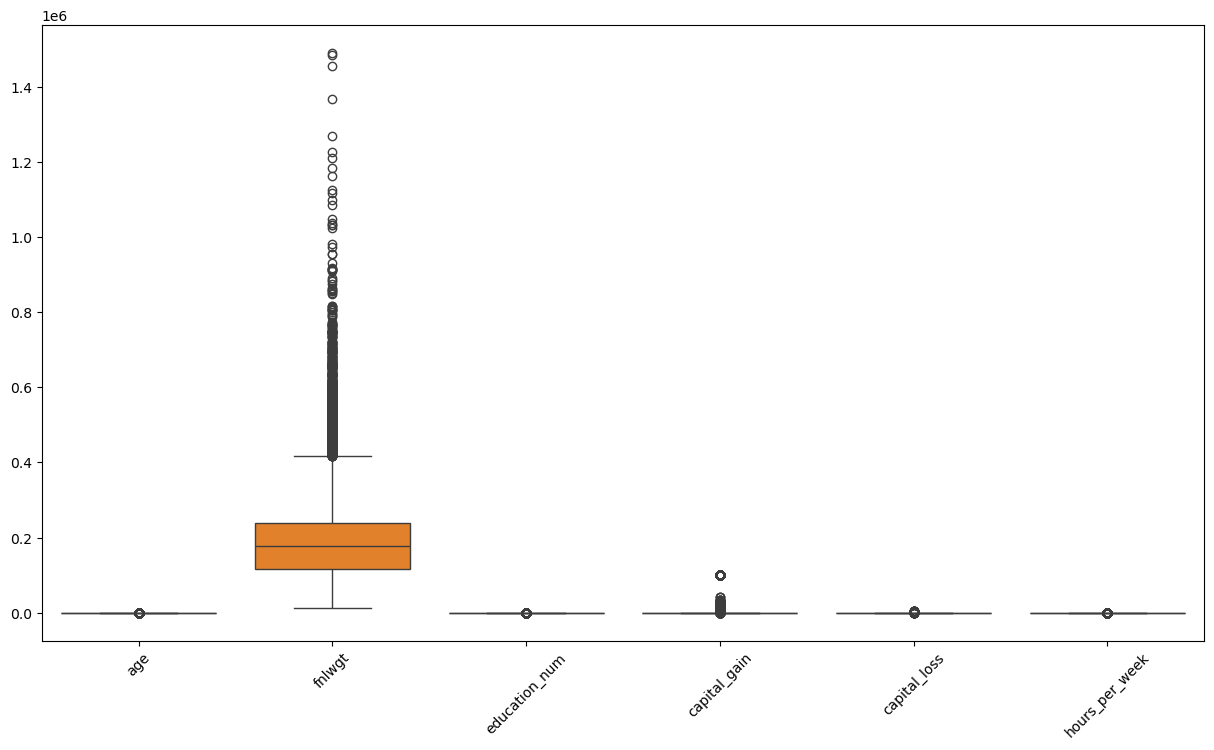

In [62]:
# using boxplot to have a better visualziation of the outliers
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sb.boxplot(data = data)
plt.xticks(rotation = 45)
plt.show()

#### Dealing with the outliers in 'fnlwgt' using IQR 

In [64]:
q1 = data['fnlwgt'].quantile(0.25)
q3 = data['fnlwgt'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr
median = data['fnlwgt'].median()
data['fnlwgt'] = data['fnlwgt'].mask((data['fnlwgt'] < lower_whisker) | (data['fnlwgt'] > upper_whisker), median)

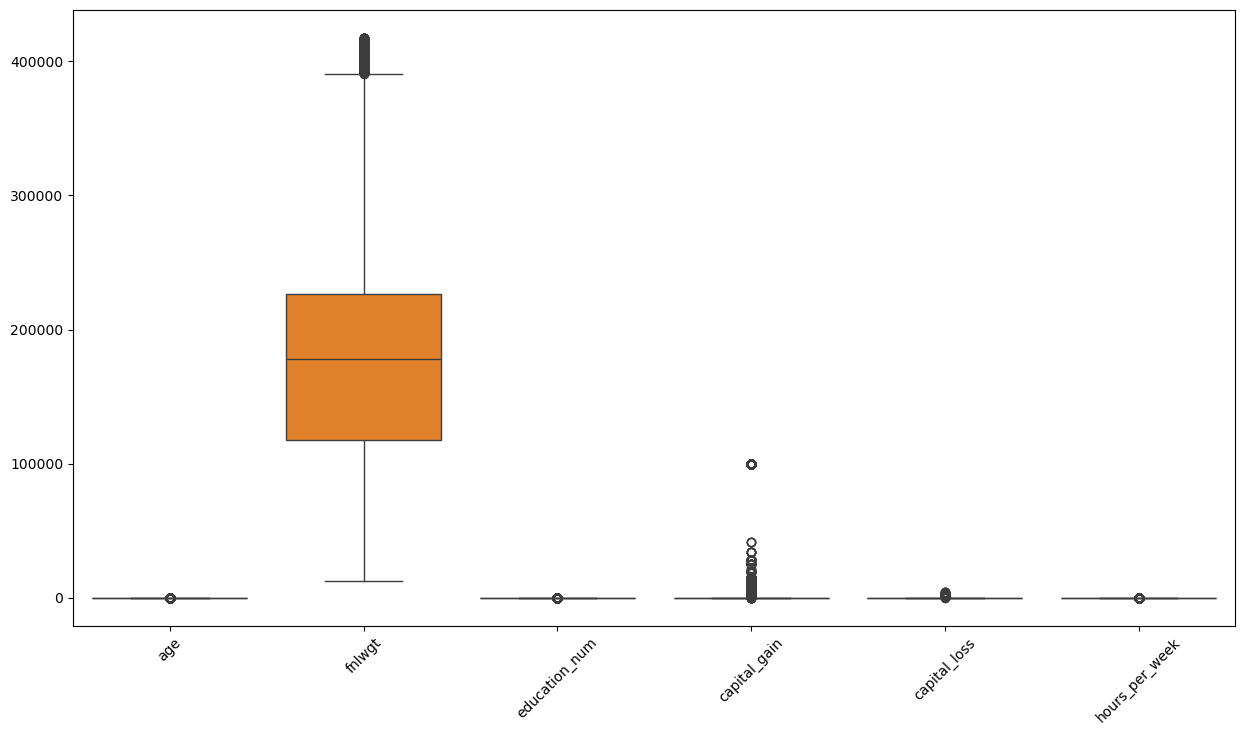

In [65]:
plt.figure(figsize=(15, 8))
sb.boxplot(data = data)
plt.xticks(rotation = 45)
plt.show()

I decided to leave the outliers in the other categories as ther are because I think model can be affected if I change value in theses categories.

### Histograms of numerical Columns

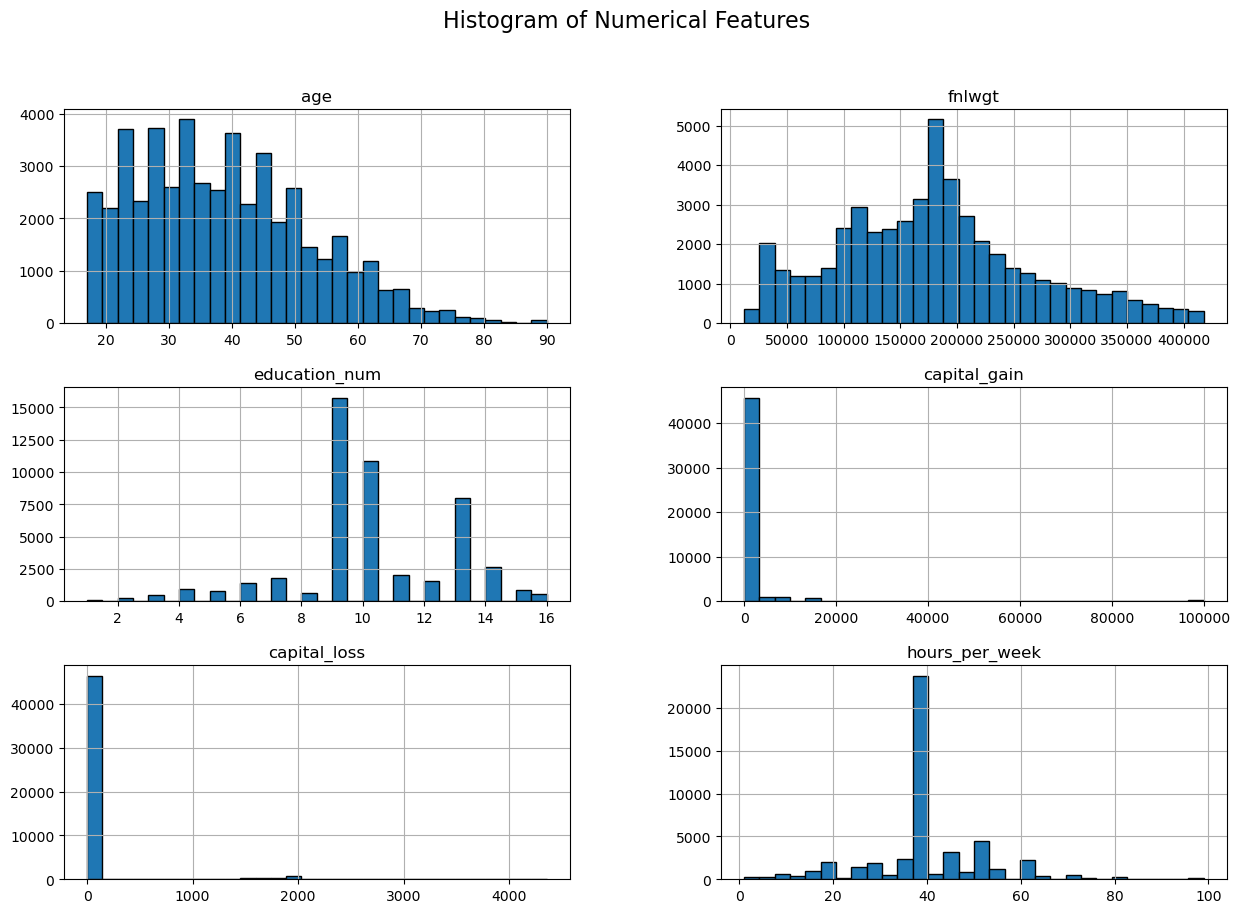

In [68]:
numeric_cols = data.select_dtypes(include = np.number)
numeric_cols.hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()

#### Observations:

* **age**: The mayority of the values are between the 20s and the 40s after that the values start decreasing
* **fnlwgt**: Highly right-skewed, with very high values in a small number of cases.
* **education_num**: The mayority of the values are in 9 and 10, this means the mayority only finish highschool.
* **capital_gain and capital_loss**: Most values are zero, with a small number of extremely high values, indicating a highly skewed distribution.
* **hours_per_week**: The mayority works 40 hours , but there is some outliers.

### Performing Categorical Encoding

In [72]:
data.head()

age         workclass    fnlwgt  education  education_num  \
0   39         State-gov   77516.0  Bachelors             13   
1   50  Self-emp-not-inc   83311.0  Bachelors             13   
2   38           Private  215646.0    HS-grad              9   
3   53           Private  234721.0       11th              7   
4   28           Private  338409.0  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [73]:
data.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

#### Encoding 'Workclass', 'marital_status', 'ocupation', 'relationshiop', 'race', 'native_country'

Since there is a lot of values in this columns I decided to perform a Label encoding on 

In [76]:
# perform label encoder in workclass
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']:
    data[i] = le.fit_transform(data[i])
    print(i, '=',data[i].dtypes)

workclass = int32
marital_status = int32
occupation = int32
relationship = int32
race = int32
native_country = int32


In [77]:
data.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0   39          6   77516.0  Bachelors             13               4   
1   50          5   83311.0  Bachelors             13               2   
2   38          3  215646.0    HS-grad              9               0   
3   53          3  234721.0       11th              7               2   
4   28          3  338409.0  Bachelors             13               2   

   occupation  relationship  race     sex  capital_gain  capital_loss  \
0           0             1     4    Male          2174             0   
1           3             0     4    Male             0             0   
2           5             1     4    Male             0             0   
3           5             0     2    Male             0             0   
4           9             5     2  Female             0             0   

   hours_per_week  native_country income  
0              40              38  <=50K  
1              13              38  <=50K  
2              40              38  <=50K  
3              40              38  <=50K  
4              40               4  <=50K

#### Encoding 'education'

In [79]:
#checking if there is a relation between education and aducation_num
data.groupby('education')['education_num'].value_counts()

education     education_num
10th          6                 1389
11th          7                 1812
12th          8                  655
1st-4th       2                  245
5th-6th       3                  507
7th-8th       4                  954
9th           5                  756
Assoc-acdm    12                1601
Assoc-voc     11                2060
Bachelors     13                8013
Doctorate     16                 594
HS-grad       9                15770
Masters       14                2656
Preschool     1                   81
Prof-school   15                 834
Some-college  10               10863
Name: count, dtype: int64

Since there is already a numerical representation of 'education' in 'education_num' I decided to just drop 'education' and keep 'education_num'

In [81]:
data.drop(columns = ['education'], inplace = True)

In [82]:
data.head()

age  workclass    fnlwgt  education_num  marital_status  occupation  \
0   39          6   77516.0             13               4           0   
1   50          5   83311.0             13               2           3   
2   38          3  215646.0              9               0           5   
3   53          3  234721.0              7               2           5   
4   28          3  338409.0             13               2           9   

   relationship  race     sex  capital_gain  capital_loss  hours_per_week  \
0             1     4    Male          2174             0              40   
1             0     4    Male             0             0              13   
2             1     4    Male             0             0              40   
3             0     2    Male             0             0              40   
4             5     2  Female             0             0              40   

   native_country income  
0              38  <=50K  
1              38  <=50K  
2              38  <=50K  
3              38  <=50K  
4               4  <=50K

In [83]:
data.dtypes

age                 int64
workclass           int32
fnlwgt            float64
education_num       int64
marital_status      int32
occupation          int32
relationship        int32
race                int32
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country      int32
income             object
dtype: object

#### Encoding 'sex' 

In [85]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

Since there is only two values in this column I decide to fermorm One Hot Encoding

In [114]:
sex_enc = pd.get_dummies(data['sex']).astype(int)
sex_enc

Female  Male
0           0     1
1           0     1
2           0     1
3           0     1
4           1     0
...       ...   ...
48837       1     0
48838       0     1
48839       0     1
48840       0     1
48841       0     1

[48790 rows x 2 columns]

In [116]:
data_encoded = pd.concat([data, sex_enc], axis = 1)
data_encoded.drop('sex', axis=1, inplace=True)

In [118]:
data_encoded.head()

age  workclass    fnlwgt  education_num  marital_status  occupation  \
0   39          6   77516.0             13               4           0   
1   50          5   83311.0             13               2           3   
2   38          3  215646.0              9               0           5   
3   53          3  234721.0              7               2           5   
4   28          3  338409.0             13               2           9   

   relationship  race  capital_gain  capital_loss  hours_per_week  \
0             1     4          2174             0              40   
1             0     4             0             0              13   
2             1     4             0             0              40   
3             0     2             0             0              40   
4             5     2             0             0              40   

   native_country income  Female  Male  
0              38  <=50K       0     1  
1              38  <=50K       0     1  
2              38  <=50K       0     1  
3              38  <=50K       0     1  
4               4  <=50K       1     0

#### Encoding 'income'

Performing a label encoding in 'income' because I dont want to split this column performing one hot encoding, and I dont think an ordinal encoding is usefull here.

In [122]:
data_encoded['income'] = le.fit_transform(data['income'])

In [124]:
data_encoded.head()

age  workclass    fnlwgt  education_num  marital_status  occupation  \
0   39          6   77516.0             13               4           0   
1   50          5   83311.0             13               2           3   
2   38          3  215646.0              9               0           5   
3   53          3  234721.0              7               2           5   
4   28          3  338409.0             13               2           9   

   relationship  race  capital_gain  capital_loss  hours_per_week  \
0             1     4          2174             0              40   
1             0     4             0             0              13   
2             1     4             0             0              40   
3             0     2             0             0              40   
4             5     2             0             0              40   

   native_country  income  Female  Male  
0              38       0       0     1  
1              38       0       0     1  
2              38       0       0     1  
3              38       0       0     1  
4               4       0       1     0

In [126]:
data_encoded.dtypes

age                 int64
workclass           int32
fnlwgt            float64
education_num       int64
marital_status      int32
occupation          int32
relationship        int32
race                int32
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country      int32
income              int32
Female              int32
Male                int32
dtype: object

Now I have all my data encoded, I can continue with the feature scaling.

### Performing a correlation matrix and feature scaling

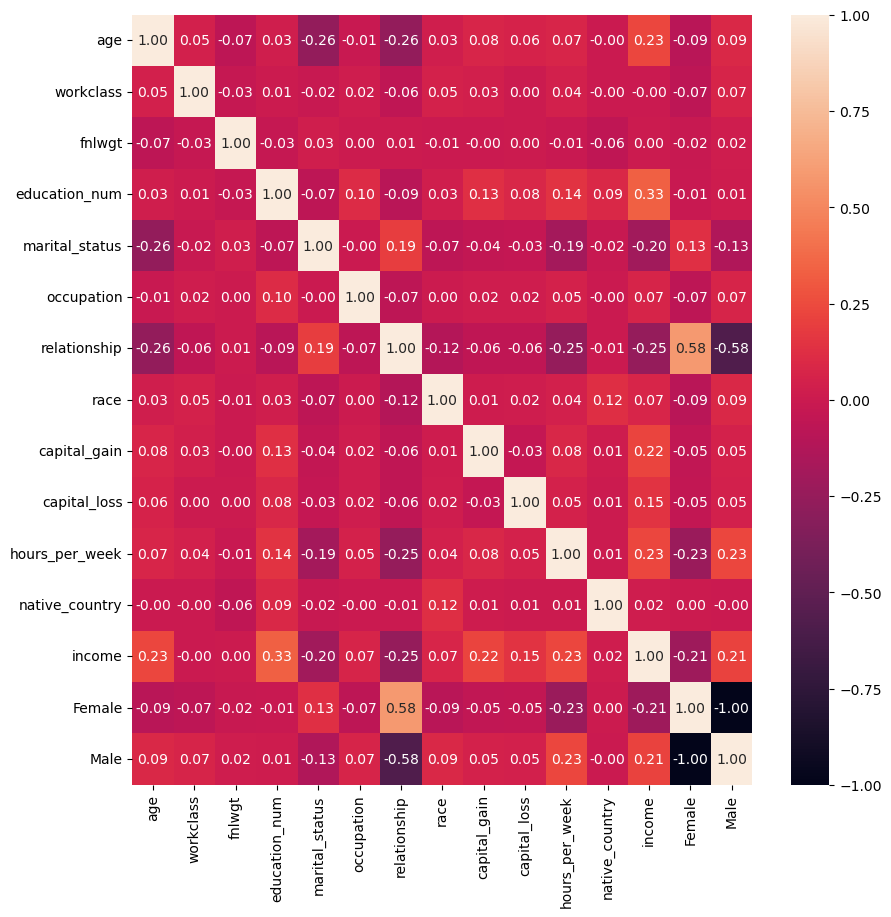

In [130]:
corr = data_encoded.corr()
plt.figure(figsize=(10, 10))
sb.heatmap(corr, annot=True, fmt=".2f")
plt.show()

The features with the higher correlation coefficent with income are:
* 'education_num' with a correlation coefficent of 0.33
* 'hours_per_week' with a correlatio coefficent of 0.23
* 'age' with a correlation coefficent of 0.23
* 'relationship' the correlation is negative but its still one of the highers whit -0.25

I decided to don't use the features with the lowes correlation coeffcient like 'workclass', 'fnlwgt' and 'native_country'

#### Performing Feature Scaling

In [135]:
from sklearn.model_selection import train_test_split
# spliting the target features and independent features
x = data_encoded.drop(['income', 'workclass', 'fnlwgt', 'native_country'], axis = 1)
y = data_encoded['income']

# spliting the data in train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"size of training data: {x_train.shape[0]}" )
print(f"size of test data: {x_test.shape[0]}")

size of training data: 39032
size of test data: 9758


The data have a lot of outliers so I decided to use robust scaler because is good with outliers

In [138]:
from sklearn.preprocessing import RobustScaler

# performing robust scaler
rob_scal = RobustScaler()
x_train_scal = rob_scal.fit_transform(x_train)
x_test_scal = rob_scal.transform(x_test)

In [140]:
x_train = pd.DataFrame(x_train_scal, columns = x_train.columns, index = x_train.index)
x_test = pd.DataFrame(x_test_scal, columns = x_test.columns, index = x_test.index)

In [142]:
x_train.head()

age  education_num  marital_status  occupation  relationship  race  \
6357  -0.40      -0.333333            -1.0   -0.571429      0.000000   0.0   
6523  -0.35       0.000000            -1.0   -0.857143      1.000000  -2.0   
9291   0.85      -0.333333             2.0    0.142857      1.000000   0.0   
14862 -0.50      -0.333333             0.0    0.714286     -0.333333   0.0   
43270  0.15      -0.333333             0.0   -0.142857     -0.333333   0.0   

       capital_gain  capital_loss  hours_per_week  Female  Male  
6357            0.0           0.0             0.0     0.0   0.0  
6523            0.0           0.0            -0.6     1.0  -1.0  
9291            0.0           0.0            -1.6     1.0  -1.0  
14862           0.0           0.0             2.0     0.0   0.0  
43270           0.0           0.0             0.0     0.0   0.0

## Machine Learning Modeling

### Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [147]:
y_lr_pred = lr.predict(x_test)

In [148]:
#accuracy score
print(f"Accuracy score of Logistic Regression: {accuracy_score(y_test, y_lr_pred)}")

Accuracy score of Logistic Regression: 0.8205574912891986


In [149]:
# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_lr_pred)
lr_conf_matrix

array([[6945,  418],
       [1333, 1062]], dtype=int64)

#### Observations:

**True Negatives (TN) = 6945**

The model correctly predicted 6945 people with income less than 50K

**False Positives (FP) = 418**

The model incorrectly predicted 418 people with income less than 50K when they actually didn't (Type I error).

**False Negatives (FN) = 1333**

The model incorrectly predicted 1333 people with income more than 50K when their actual income is less than 50K (Type II error).

**True Positives (TP) = 1062**

The model correctly predicted 1062 people with income more than 50K.

In [156]:
# classification report
target_names = ['Less than 50K', 'More than 50K']
print(classification_report(y_test, y_lr_pred, target_names=target_names))

               precision    recall  f1-score   support

Less than 50K       0.84      0.94      0.89      7363
More than 50K       0.72      0.44      0.55      2395

     accuracy                           0.82      9758
    macro avg       0.78      0.69      0.72      9758
 weighted avg       0.81      0.82      0.80      9758



#### Observations:

The acurracy of this model is 82%, the model do a better job predicting people who win less than 50K, maybe this can be because of there is a class imbalance.

### KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier

# Test differents values of K to perform KNN
errors_rate = []
k_values = range(1,51)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors_rate.append(error)

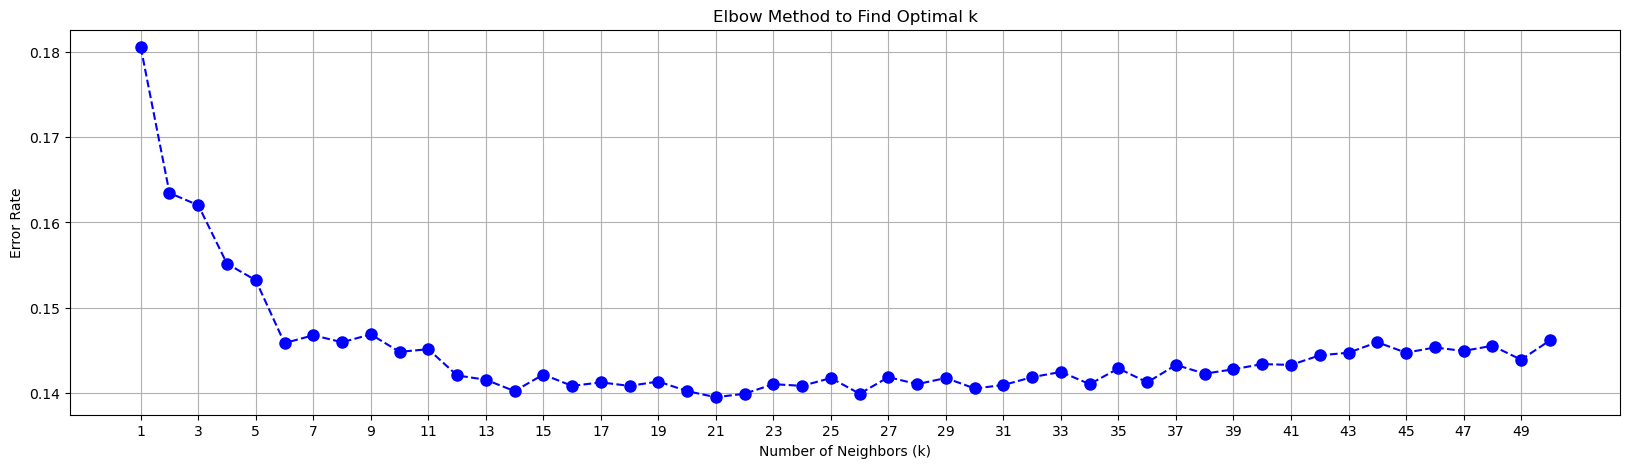

In [162]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, errors_rate, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.show()

The error rate significantly decreased when k=14, k=21 and k=26. After that, we don't see any further dip.

In [166]:
# Calculate test accuracy when k=14, k=21 and k=26
for i in [14,21,26]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)  # Train the model
    Y_pred = knn.predict(x_test)  # Predict on test set
    print(f"Accuracy score for KNN with {i} neighbors : {accuracy_score(y_test, y_pred)}")

Accuracy score for KNN with 14 neighbors : 0.8538634966181594
Accuracy score for KNN with 21 neighbors : 0.8538634966181594
Accuracy score for KNN with 26 neighbors : 0.8538634966181594


Since the accuracy score is the same for the four k values, the next think is perform a cross validation, but only in odd values k=21

In [169]:
from sklearn.model_selection import cross_val_score
from statistics import mean

#Calculate cross validation score k=21
score_k_21 = cross_val_score(KNeighborsClassifier(n_neighbors=21), x_train, y_train, cv=5)
avg_score_k_21 = mean(score_k_21)
print(f"Average score for 21 neighbors: {avg_score_k_21}")

Average score for 21 neighbors: 0.8615751166505052


In [171]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [173]:
y_knn_pred = knn.predict(x_test)

In [174]:
#accuracy score
print(f"Accuracy score of Logistic Regression: {accuracy_score(y_test, y_knn_pred)}")

Accuracy score of Logistic Regression: 0.8605246976839517


In [177]:
# confusion matrix
knn_conf_matrix = confusion_matrix(y_test, y_knn_pred)
knn_conf_matrix

array([[6862,  501],
       [ 860, 1535]], dtype=int64)

#### Observations:

**True Negatives (TN) = 6862**

The model correctly predicted 6862 people with income less than 50K

**False Positives (FP) = 501**

The model incorrectly predicted 501 people with income less than 50K when they actually didn't (Type I error).

**False Negatives (FN) = 860**

The model incorrectly predicted 860 people with income more than 50K when their actual income is less than 50K (Type II error).

**True Positives (TP) = 1535**

The model correctly predicted 1535 people with income more than 50K.

In [181]:
# classification report
target_names = ['Less than 50K', 'More than 50K']
print(classification_report(y_test, y_knn_pred, target_names=target_names))

               precision    recall  f1-score   support

Less than 50K       0.89      0.93      0.91      7363
More than 50K       0.75      0.64      0.69      2395

     accuracy                           0.86      9758
    macro avg       0.82      0.79      0.80      9758
 weighted avg       0.86      0.86      0.86      9758



The acurracy of this model is 86%,is better than the logistic regression, but again the model do a better job predicting people who win less than 50K, maybe this can be because of there is a class imbalance.

### Desicion Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier

dt_clr = DecisionTreeClassifier()
dt_clr.fit(x_train, y_train)

DecisionTreeClassifier()

In [187]:
y_dt_pred = dt_clr.predict(x_test)

In [197]:
# acurracy score
print(f"Accuracy for Decision Tree Classifier: {accuracy_score(y_test, y_dt_pred)}")

Accuracy for Decision Tree Classifier: 0.8180979708956754


In [199]:
#Find the best value for max_depth in decision tree
scores = []
depths = range(1, 21)
for d in depths:
    score = cross_val_score(DecisionTreeClassifier(max_depth=d), x_train, y_train, cv=5)
    avg_score = mean(score)
    scores.append(avg_score)

In [200]:
best_depth = depths[np.argmax(scores)]
print(f"Best max_depth: {best_depth}")

Best max_depth: 9


In [203]:
dt_clr_opt = DecisionTreeClassifier(max_depth=9)
dt_clr_opt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9)

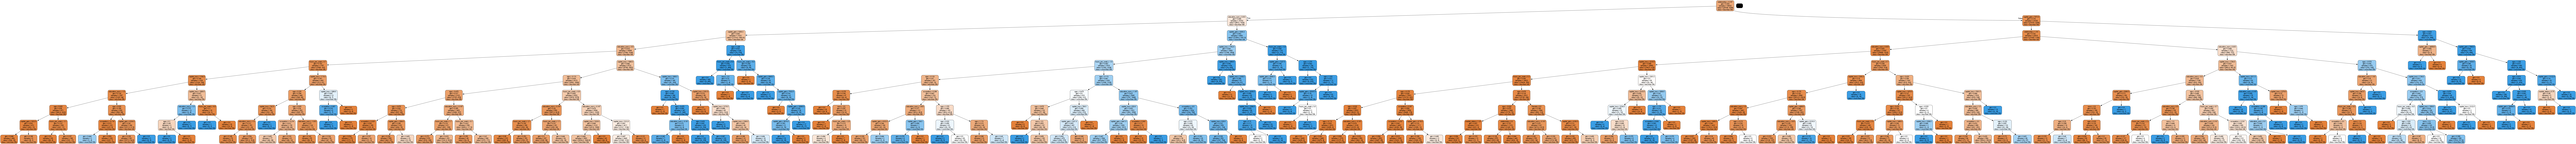

In [205]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

#DOT format is used to visualize graphs
dot_data = StringIO()
    
# Export graph for the underlying decision tree
export_graphviz(
    dt_clr_opt, 
    out_file=dot_data, #Directs the graph data to the dot_data object instead of saving directly to a file.
    filled=True,  #Fills the nodes with colors based on class distribution 
    rounded=True, #Rounds the corners of the nodes for a cleaner look.
    special_characters=True, #Allows the use of special characters like ≤ in the tree for clarity.
    feature_names=x.columns, 
    class_names=['less than 50k', 'more than 50k']
)
    
# Generate and display the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  #Retrieves the DOT data as a string from the in-memory object.
graph.write_png(f'Desicion_tree.png')  #Converts the DOT-format string into a graph object that can be rendered as an image.
display(Image(filename=f'Desicion_tree.png'))

In [207]:
y_dt_opt_pred = dt_clr_opt.predict(x_test)

In [209]:
print(f"Accuracy score for the optimized decision tree classifier: {accuracy_score(y_test, y_dt_opt_pred)}")

Accuracy score for the optimized decision tree classifier: 0.8543758967001435


In [211]:
# confusion matrix
knn_conf_matrix = confusion_matrix(y_test, y_dt_opt_pred)
knn_conf_matrix

array([[7032,  331],
       [1090, 1305]], dtype=int64)

#### Observations:

**True Negatives (TN) = 7032**

The model correctly predicted 7032 people with income less than 50K

**False Positives (FP) = 331**

The model incorrectly predicted 331 people with income less than 50K when they actually didn't (Type I error).

**False Negatives (FN) = 1090**

The model incorrectly predicted 1090 people with income more than 50K when their actual income is less than 50K (Type II error).

**True Positives (TP) = 1305**

The model correctly predicted 1305 people with income more than 50K.

In [214]:
# classification report
target_names = ['Less than 50K', 'More than 50K']
print(classification_report(y_test, y_dt_opt_pred, target_names=target_names))

               precision    recall  f1-score   support

Less than 50K       0.87      0.96      0.91      7363
More than 50K       0.80      0.54      0.65      2395

     accuracy                           0.85      9758
    macro avg       0.83      0.75      0.78      9758
 weighted avg       0.85      0.85      0.84      9758



The acurracy of this model is 85%, but again the model do a better job predicting people who win less than 50K, maybe this can be because of there is a class imbalance.

### SVM

In [267]:
from sklearn.svm import SVC

svc = SVC(probability = True)
svc.fit(x_train, y_train)

SVC(probability=True)

In [269]:
y_svc_pred = svc.predict(x_test)

In [270]:
# accuracy score
print(f'Accuracy score for SVM classifier: {accuracy_score(y_test, y_svc_pred)}')

Accuracy score for SVM classifier: 0.7979094076655052


#### Optimizing SVM model with GridSearchCV

I wasn't able to runthis part, but this is how I supose to perform GridSearchCV in SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_svm.fit(x_train, y_train)

In [ ]:
grid_svm.best_estimator_

In [ ]:
best_svm = SVC(C = , kernel = '')
best_svm.fit(x_train, y_train)

In [ ]:
y_best_svm_pred = best_svm.predict(x_test)

In [229]:
print(f"Accuracy score for the optimized SVM classifier: {accuracy_score(y_test, y_best_svm_pred)}")

Accuracy score for the optimized SVM classifier: 0.7979094076655052


#### Confusion matrix and classification report of SVM without the optimization

In [273]:
# confusion matrix
svm_conf_matrix = confusion_matrix(y_test, y_svc_pred)
svm_conf_matrix

array([[7145,  218],
       [1754,  641]], dtype=int64)

#### Observations:

**True Negatives (TN) = 7145**

The model correctly predicted 7145 people with income less than 50K

**False Positives (FP) = 218**

The model incorrectly predicted 218 people with income less than 50K when they actually didn't (Type I error).

**False Negatives (FN) = 1745**

The model incorrectly predicted 1745 people with income more than 50K when their actual income is less than 50K (Type II error).

**True Positives (TP) = 641**

The model correctly predicted 641 people with income more than 50K.

In [275]:
# classification report
target_names = ['Less than 50K', 'More than 50K']
print(classification_report(y_test, y_svc_pred, target_names=target_names))

               precision    recall  f1-score   support

Less than 50K       0.80      0.97      0.88      7363
More than 50K       0.75      0.27      0.39      2395

     accuracy                           0.80      9758
    macro avg       0.77      0.62      0.64      9758
 weighted avg       0.79      0.80      0.76      9758



#### Observations:

The acurracy of this model is 80%, but again the model do a better job predicting people who win less than 50K, although is not much differences I think its significative.

### Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [243]:
y_rf_pred = rf.predict(x_test)

In [244]:
print(f'Accuracy score for Random Forest: {accuracy_score(y_test, y_rf_pred)}')

Accuracy score for Random Forest: 0.8449477351916377


In [248]:
importances = rf.feature_importances_
#Sort the feature importances in the descending order of Gini importance
feature_names = x.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

           Feature  Gini Importance
0              age         0.238003
1    education_num         0.141975
6     capital_gain         0.135687
4     relationship         0.126205
8   hours_per_week         0.120173
3       occupation         0.090105
2   marital_status         0.069921
7     capital_loss         0.045652
5             race         0.019692
9           Female         0.006305
10            Male         0.006282


In [250]:
# confusion matrix
knn_conf_matrix = confusion_matrix(y_test, y_rf_pred)
knn_conf_matrix

array([[6753,  610],
       [ 903, 1492]], dtype=int64)

#### Observations:

**True Negatives (TN) = 6753**

The model correctly predicted 6753 people with income less than 50K

**False Positives (FP) = 610**

The model incorrectly predicted 610 people with income less than 50K when they actually didn't (Type I error).

**False Negatives (FN) = 903**

The model incorrectly predicted 903 people with income more than 50K when their actual income is less than 50K (Type II error).

**True Positives (TP) = 1492**

The model correctly predicted 1492 people with income more than 50K.

In [258]:
# classification report
target_names = ['Less than 50K', 'More than 50K']
print(classification_report(y_test, y_rf_pred, target_names=target_names))

               precision    recall  f1-score   support

Less than 50K       0.88      0.92      0.90      7363
More than 50K       0.71      0.62      0.66      2395

     accuracy                           0.84      9758
    macro avg       0.80      0.77      0.78      9758
 weighted avg       0.84      0.84      0.84      9758



The acurracy of this model is 84%, with an 88% of accuracy of predicting people winning less than 50k and a 71% of accuracy of predicting people winning more than 50k.

## Plot the AUC-ROC curve

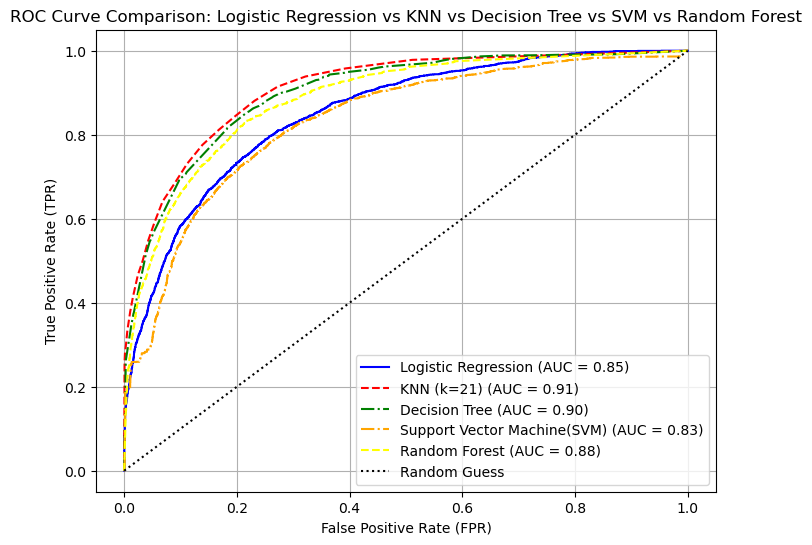

In [280]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_lr_probs = lr.predict_proba(x_test)[:, 1]
y_knn_21_probs = knn.predict_proba(x_test)[:, 1]
y_dt_probs = dt_clr_opt.predict_proba(x_test)[:, 1]
y_svm_probs = svc.predict_proba(x_test)[:, 1]
y_rf_probs = rf.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_knn_21_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=21) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN vs Decision Tree vs SVM vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

### Observations

All the models have a great perfomance, but the best perfomace is for KNN with a AUC of 0.91

## Handling Class Imbalance with SMOTE

In [285]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)

In [287]:
y.value_counts()

income
0    37109
1    37109
Name: count, dtype: int64

In [289]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### ML Modeling

#### Logistic Regression

In [293]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [295]:
y_lr_pred = lr.predict(x_test)

In [297]:
print(f'Accuracy score for Logistic Regression: {accuracy_score(y_test, y_lr_pred)}')

Accuracy score for Logistic Regression: 0.767178658043654


#### KNN

In [300]:
errors_rate = []
k_values = range(1,51)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors_rate.append(error)

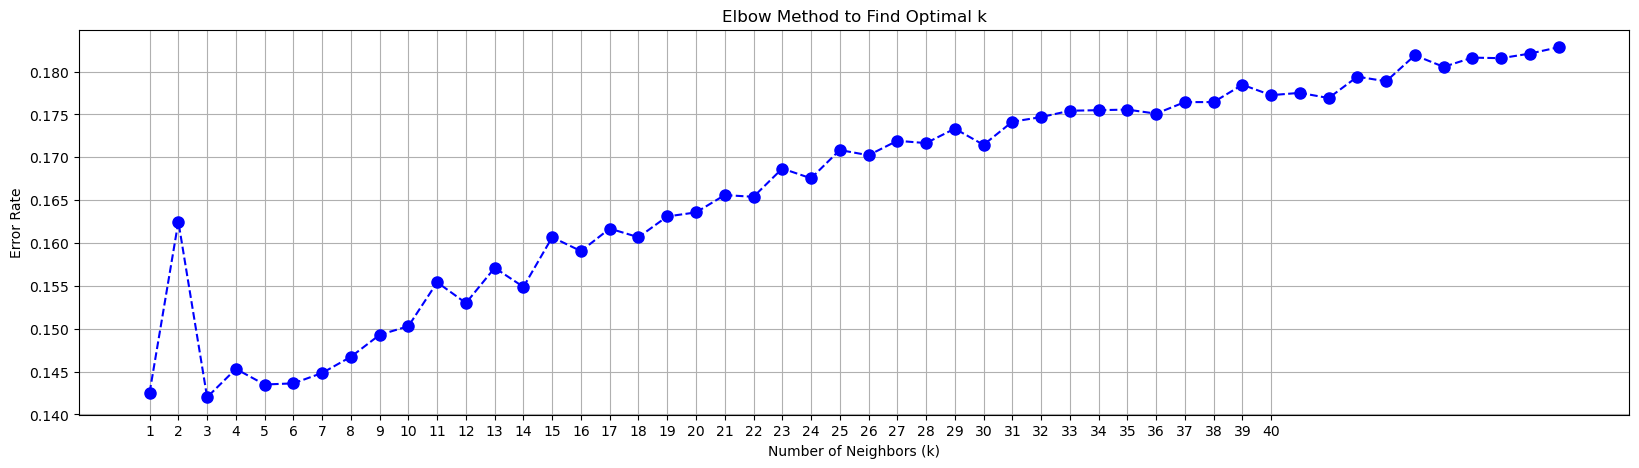

In [301]:
plt.figure(figsize=(20, 5))
plt.plot(k_values, errors_rate, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 41))
plt.grid(True)
plt.show()

In [304]:
#Choosing k=3 for balanced option
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [306]:
y_knn_3_pred = knn_3.predict(x_test)
print(f'Accuracy score for KNN: {accuracy_score(y_test, y_knn_3_pred)}')

Accuracy score for KNN: 0.8579897601724602


#### Decision Tree

In [309]:
dt_clr = DecisionTreeClassifier(criterion= 'entropy')
dt_clr.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [311]:
y_dt_pred = dt_clr.predict(x_test)

In [313]:
print(f'Accuracy score for Decision Tree: {accuracy_score(y_test, y_dt_pred)}')

Accuracy score for Decision Tree: 0.8589329021827001


#### SVM

In [320]:
svm = SVC(probability = True)
svm.fit(x_train, y_train)

SVC(probability=True)

In [323]:
y_svm_pred = svm.predict(x_test)

In [324]:
print(f'Accuracy score for SVM: {accuracy_score(y_test, y_svm_pred)}')

Accuracy score for SVM: 0.6283346806790623


#### Random Forest

In [329]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [330]:
y_rf_pred = rf.predict(x_test)

In [331]:
print(f'Accuracy score for Random Forest: {accuracy_score(y_test, y_rf_pred)}')

Accuracy score for Random Forest: 0.8798841282673134


### AUC-ROC curve to compare the performance of all the classification models after SMOTE

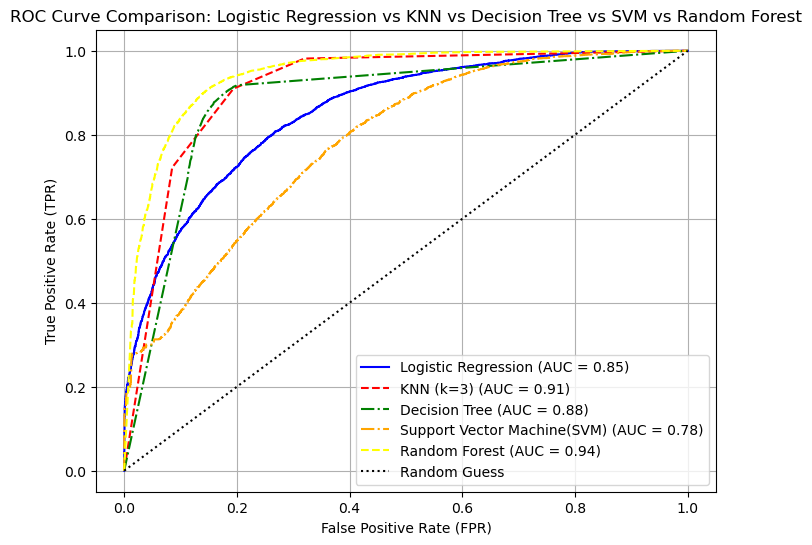

In [336]:
y_lr_probs = lr.predict_proba(x_test)[:, 1]
y_knn_3_probs = knn_3.predict_proba(x_test)[:, 1]
y_dt_probs = dt_clr.predict_proba(x_test)[:, 1]
y_svm_probs = svm.predict_proba(x_test)[:, 1]
y_rf_probs = rf.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_knn_3_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=3) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN vs Decision Tree vs SVM vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

### Observations

Now with the class imbalance handled the Random Forest have a better AUC Score with 0.94. This mean that Random Forest may be the best model in this case.